In [1]:
import pandas as pd
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
from sklearn.cluster import KMeans

In [2]:
num_labels = 20

In [3]:
df = pd.read_csv('./gridsat.path.ibtr.windspeed.csv')

In [4]:
df['PATH'] = df['PATH'].map(lambda x: x.replace('/home/ices/work/typhoon_intensity/data/GridSat_B1_new_npy', './GridSat_B1_new_npy'))

In [5]:
paths = df['PATH'].to_numpy()

In [6]:
for path in tqdm(paths):
    # print(path)
    img = np.load(path)[0]
    kmeans = KMeans(num_labels, random_state=0, n_init='auto').fit(img.reshape(-1, 1))
    clusters, kcentroids = kmeans.labels_.reshape(256, 256), kmeans.cluster_centers_
    item = {
        "centers":kcentroids,
        "labels":clusters,
    }
    prefix = path.split('.npy')[0].replace('GridSat_B1_new_npy', 'GridSat_B1_new_kmean{}/cluster'.format(num_labels))
    suffix = '.kmean{}.pkl'.format(num_labels)
    cluster_name = prefix + suffix
    with open(cluster_name, 'wb') as f: 
        # 注意: 使用pickle必须包含 'b'
        pickle.dump(item, f)

100%|██████████████████████████████████████████████████████████████████████████| 55316/55316 [2:05:45<00:00,  7.33it/s]


In [7]:
cluster_name

'./GridSat_B1_new_kmean20/cluster/2020360S16057/2020360S16057.202012300000.kmean20.pkl'

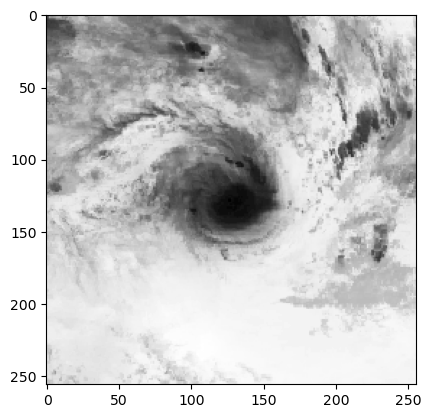

In [8]:
plt.imshow(img,'gray')

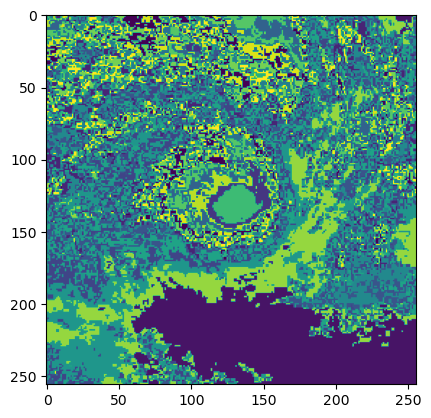

In [9]:
plt.imshow(clusters)

In [10]:
with open(cluster_name, 'rb') as f:
    item = pickle.load(f)

In [11]:
item

{'centers': array([[238.02502],
        [295.34244],
        [262.20325],
        [199.07501],
        [283.58438],
        [273.1248 ],
        [214.64676],
        [227.14029],
        [248.5936 ],
        [267.86298],
        [287.7785 ],
        [278.66223],
        [256.98682],
        [190.4711 ],
        [221.46213],
        [243.715  ],
        [291.36765],
        [207.3841 ],
        [232.27988],
        [252.69994]], dtype=float32),
 'labels': array([[14, 15, 19, ...,  1,  4, 11],
        [ 6, 14, 12, ...,  1, 16, 11],
        [ 6, 14, 12, ..., 16,  4,  4],
        ...,
        [ 9,  5,  5, ...,  1,  1,  1],
        [ 9,  5,  5, ...,  1,  1,  1],
        [ 5,  5,  5, ...,  1,  1,  1]])}